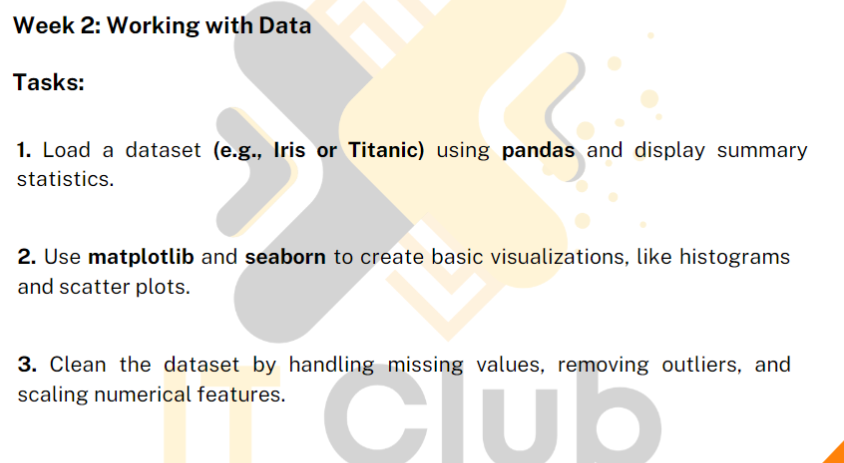

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [21]:
# Task 1: Load a dataset (Iris) using pandas and display summary statistics



# Load dataset (Iris)
iris_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv" # you can directly just throw the github link of the dataset here and load it in, didn't know that before
iris_path = "Datasets/Iris_Dataset.csv"
# df_url = pd.read_csv(iris_url)    # not needed since we will be working with the local dataset
df = pd.read_csv(iris_path)

print("\nSummary Statistics:")
print(df.describe())
print("\nFirst Five Rows:")
print(df.head())


Summary Statistics:
       SepalLength  SepalWidth  PetalLength  PetalWidth
count    12.000000   12.000000    12.000000   12.000000
mean      5.900000    3.075000     3.875000    1.250000
std       0.996357    0.369582     1.981333    0.850134
min       4.700000    2.300000     1.300000    0.200000
25%       4.975000    3.000000     1.400000    0.200000
50%       5.900000    3.150000     4.500000    1.450000
75%       6.600000    3.225000     5.125000    1.800000
max       7.600000    3.600000     6.600000    2.500000

First Five Rows:
   SepalLength  SepalWidth  PetalLength  PetalWidth          Species
0          5.1         3.5          1.4         0.2      Iris-setosa
1          4.9         3.0          1.4         0.2      Iris-setosa
2          4.7         3.2          1.3         0.2      Iris-setosa
3          5.0         3.6          1.4         0.2      Iris-setosa
4          7.0         3.2          4.7         1.4  Iris-versicolor


In [26]:
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

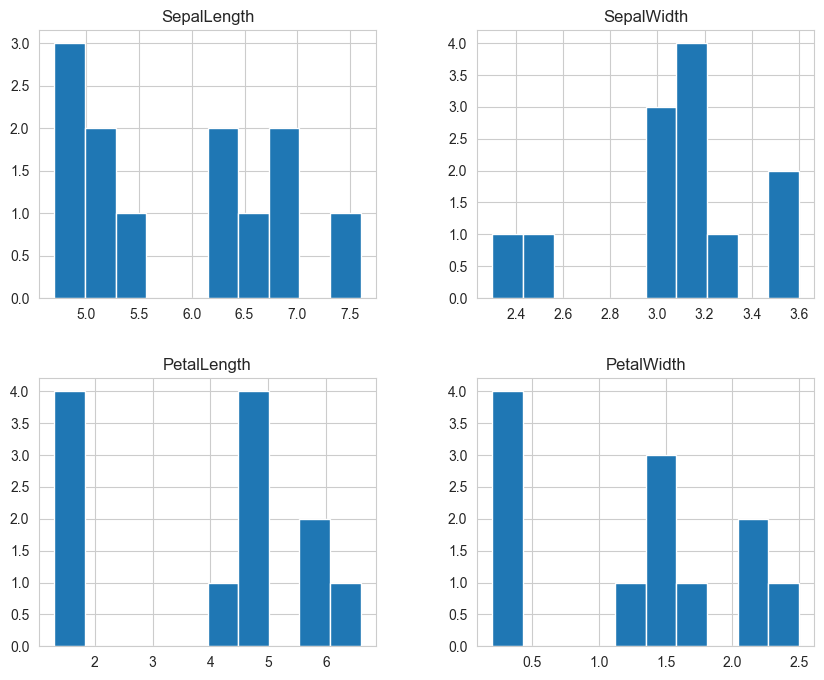

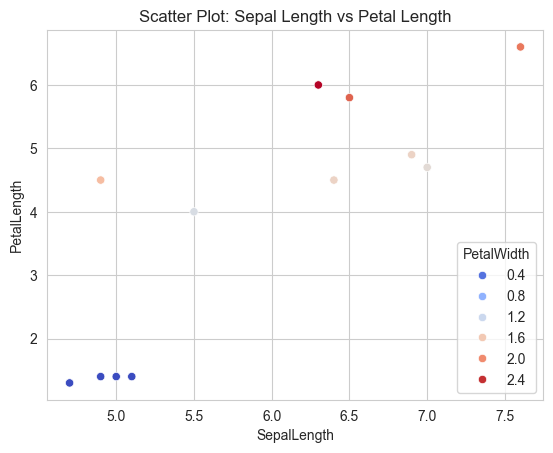

In [22]:
# Task 2: Visualize the dataset using Matplotlib and Seaborn


sns.set_style("whitegrid")
df.hist(figsize=(10, 8), bins=10)
plt.show()

sns.scatterplot(x=df["SepalLength"], y=df["PetalLength"], hue=df["PetalWidth"], palette="coolwarm")
plt.title("Scatter Plot: Sepal Length vs Petal Length")
plt.show()

In [23]:
# Task 3: Clean the dataset

imputer = SimpleImputer(strategy="mean")
df_numeric = df.select_dtypes(include=["number"])
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

Q1 = df_imputed.quantile(0.25)
Q3 = df_imputed.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df_imputed[~((df_imputed < (Q1 - 1.5 * IQR)) | (df_imputed > (Q3 + 1.5 * IQR))).any(axis=1)]

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_no_outliers), columns=df_no_outliers.columns)

print("\nCleaned and Scaled Data:")
print(df_scaled.head())


Cleaned and Scaled Data:
   SepalLength  SepalWidth  PetalLength  PetalWidth
0    -1.095069    2.132007    -1.327447   -1.296625
1    -1.302556   -1.066004    -1.327447   -1.296625
2    -1.510043    0.213201    -1.377226   -1.296625
3     0.876055    0.213201     0.315269    0.103730
4     0.253595    0.213201     0.215710    0.220426


Ignore the stuff below, I asked gpt to generate a summary of the dataset cz I was curious about it

# **Iris Dataset Summary and Column Explanation**

## 📌 **Introduction**
The **Iris dataset** is a well-known dataset in machine learning and statistics, often used for classification and clustering tasks. It contains measurements of different iris flowers' **sepal** and **petal** dimensions, helping in distinguishing between species.

---

## 📊 **Columns in the Dataset**
The dataset consists of **five columns**, capturing key measurements of iris flowers:

1. **SepalLength (cm)** 🌱  
   - Represents the **length of the sepal** (outer petal-like structure of a flower).
   - Measured in **centimeters (cm)**.
   - Helps in species differentiation.

2. **SepalWidth (cm)** 🌱  
   - Represents the **width of the sepal**.
   - Also measured in **centimeters (cm)**.
   - Contributes to identifying species variations.

3. **PetalLength (cm)** 🌺  
   - Refers to the **length of the petal** (colored part of the flower).
   - Measured in **centimeters (cm)**.
   - Important for distinguishing between iris species.

4. **PetalWidth (cm)** 🌺  
   - Represents the **width of the petal**.
   - Measured in **centimeters (cm)**.
   - A significant feature in classification.

5. **Species (Categorical)** 🔤  
   - Specifies the **species** of the iris flower.
   - This is a **categorical column** with values like:
     - *Iris-setosa*
     - *Iris-versicolor*
     - *Iris-virginica*
   - Used as the **target variable** in classification tasks.

---

## 🔍 **Dataset Insights**
- The dataset is **numerical and categorical**.
- It is **widely used** for classification models, visualization, and statistical analysis.
- **Sepal and petal dimensions** play a crucial role in differentiating species.